In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

In [2]:
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [4]:
#traning phase 

# For plotting metrics
alpha = 0.1 #learning rate
gamma = 0.6 #discount factor
epsilon = 0.1 #trade-off between exploration and exploitation





for i in range(1, 100001):#we will see training of 100000 episodes
    state = env.reset() #reset env 
    epochs = 0 
    penalties = 0
    reward = 0
    
    done = False
    while not done:

        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        
        next_state, reward, done, info = env.step(action) #take action 
        old_value = q_table[state, action] #get old value
        next_max = np.max(q_table[next_state]) 
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value #update the table with the new value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        


     
    #live updates of the episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
print("traning agent is done.\n")

Episode: 100000
traning agent is done.



In [5]:
q_table[328]

array([ -2.41719014,  -2.27325184,  -2.40862987,  -2.35744178,
       -10.6852675 , -11.12721093])

In [6]:
#evaluating phase 
episodes = 300
sum_of_epochs = 0
sum_of_penalties = 0
frames = [] # for animation
reward_list=[]

for i in range(episodes): #looping 300 episodes
    
    state = env.reset() 
    epochs = 0
    penalties = 0
    episode_reward = 0
    

    done = False
    while not done:# while episodes not done will choose from Q table and taking action 
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
            }
        )

        epochs += 1 # increment the cumulative epoch
        episode_reward+=reward # increment the cumulative reward
    
    reward_list.append(episode_reward) # append the episode cumulative reward to the reward list
    sum_of_epochs += epochs        #get sum of epochs
    sum_of_penalties += penalties  #get sum of penalties

print("shows result of timesteps and penalties after completing 300 episodes:")
print("Timestep: ", sum_of_epochs)
print("Penalties:", sum_of_penalties)

shows result of timesteps and penalties after completing 300 episodes:
Timestep:  3994
Penalties: 0


In [ ]:
def show_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
show_frames(frames)

Text(0.5, 1.0, 'avrage of Q-learning timesteps and paneltiy for 300 episodes')

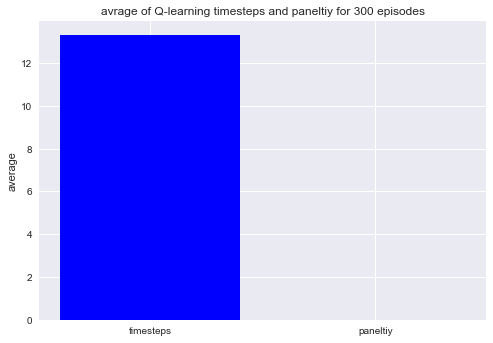

In [7]:
#graph q_learning of timesteps and penalties using the average of both result

plt.style.use('seaborn')
x = ['timesteps','paneltiy']
q_learning_ave = [sum_of_epochs/episodes, sum_of_penalties/episodes]
plt.bar(x, q_learning_ave, color='blue')
plt.ylabel("average")
plt.title("avrage of Q-learning timesteps and paneltiy for 300 episodes")